**Importing the required libraries**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

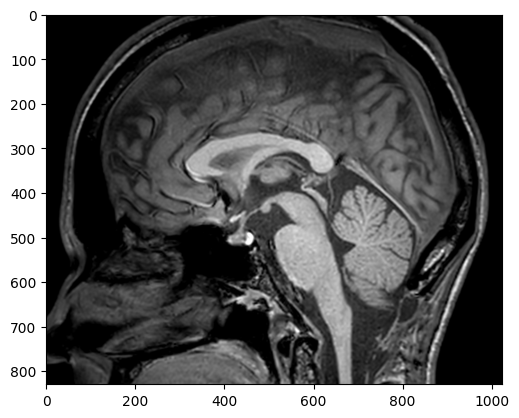

In [9]:
file_path = "D:\\Personal Projects\\Brain-Tumor\\MRI Datasets\\Training\\non-tumor\\Tr-no_0021.jpg"

if os.path.exists(file_path):
    img = mpimg.imread(file_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    print(f"File not found: {file_path}")

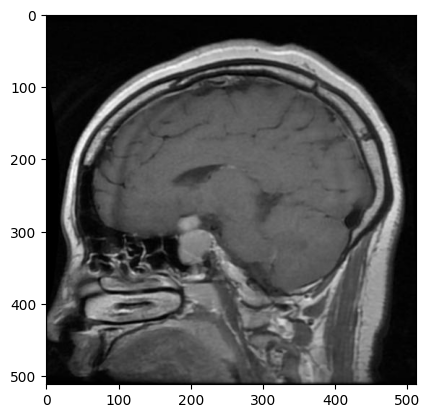

In [10]:
file_path = "D:\\Personal Projects\\Brain-Tumor\\MRI Datasets\\Training\\tumor\\Tr-pi_0021.jpg"

if os.path.exists(file_path):
    img = mpimg.imread(file_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    print(f"File not found: {file_path}")

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [11]:
import os
from PIL import Image
import numpy as np

non_tumor_path = "D:\\Personal Projects\\Brain-Tumor\\MRI Datasets\\Training\\non-tumor"
tumor_path = "D:\\Personal Projects\\Brain-Tumor\\MRI Datasets\\Training\\tumor"

non_tumor_files = os.listdir(non_tumor_path)
tumor_files = os.listdir(tumor_path)

data = []
labels = []

# For non-tumor images (label = 0)
for img_file in non_tumor_files:
    image = Image.open(non_tumor_path + '\\' + img_file)
    image = image.resize((256, 256))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(0)  # Label for non-tumor images

# For tumor images (label = 1)
for img_file in tumor_files:
    image = Image.open(tumor_path + '\\' + img_file)
    image = image.resize((256, 256))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(1)  # Label for tumor images

# Convert data and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

print(f"Data shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

Data shape: (3052, 256, 256, 3)
Labels shape: (3052,)


In [12]:
print(Y)

[0 0 0 ... 1 1 1]


**Train Test Split**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(3052, 256, 256, 3) (2441, 256, 256, 3) (611, 256, 256, 3)


In [15]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [16]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [17]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

**Building a Convolutional Neural Networks (CNN)**

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming X and Y are your original dataset features and labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

# Normalize pixel values to be between 0 and 1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Step 1: CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(2, activation='softmax')
])

# Compiling the model with binary cross-entropy for a binary classification task
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Used 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)

# Step 2: Train the Model
history = model.fit(
    X_train_scaled, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, Y_test)
)

# Step 3: Make Predictions on the Test Set
predictions = model.predict(X_test_scaled)
y_pred = np.argmax(predictions, axis=1)

# Step 4: Calculate Precision, Recall, and F1 Score
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=["Class 0", "Class 1"]))

# Calculate and print the overall accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

(3052, 256, 256, 3) (2441, 256, 256, 3) (611, 256, 256, 3)


d:\Personal Projects\Brain-Tumor\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8493 - loss: 3.4110 - val_accuracy: 0.7087 - val_loss: 8.3965
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9388 - loss: 1.3094 - val_accuracy: 0.6547 - val_loss: 7.5651
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9480 - loss: 1.3726 - val_accuracy: 0.6694 - val_loss: 7.0481
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9760 - loss: 0.3540 - val_accuracy: 0.8167 - val_loss: 1.7849
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9660 - loss: 0.5336 - val_accuracy: 0.9051 - val_loss: 0.9499
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9756 - loss: 0.4318 - val_accuracy: 0.9591 - val_loss: 0.3640
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9767 - loss: 0.2725 - val_accuracy: 0.9591 - val_loss: 0.5565
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9778 - loss: 0.2448 - val_accuracy: 0.9787 - v

**Model Evaluation**

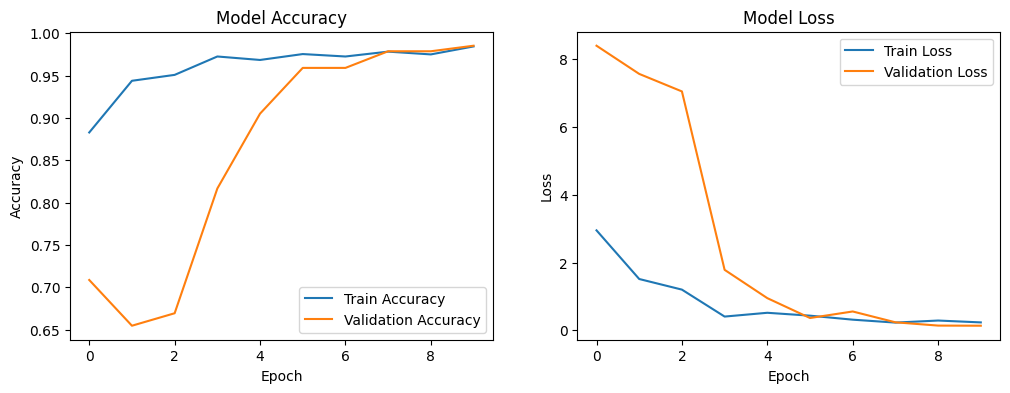

In [19]:
import matplotlib.pyplot as plt

# Ploting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Ploting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


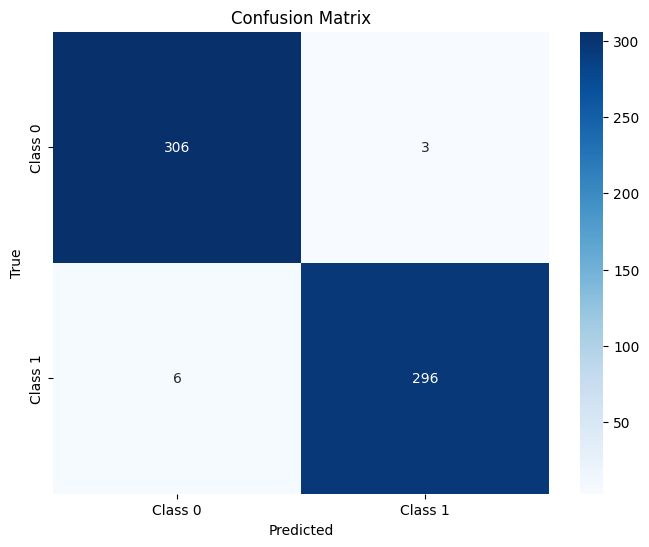

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Predictive System**

In [27]:
from PIL import Image
import numpy as np

# Input the image path
input_image_path = input('Path of the image to be predicted: ')

# Open the image using PIL
input_image = Image.open(input_image_path)

# Ensure the image is RGB (in case it's grayscale or has a different format)
input_image = input_image.convert('RGB')

# Resize the image to match the model's expected input size (256x256)
input_image = input_image.resize((256, 256))

# Convert the image to a NumPy array and normalize pixel values (0-255 to 0-1)
input_image = np.array(input_image) / 255.0

# Check the shape of the image array to make sure it matches (256, 256, 3)
print("Image shape before reshaping:", input_image.shape)

# Reshape the image for model input (batch size of 1)
input_image_reshaped = np.reshape(input_image, (1, 256, 256, 3))

# Predict the class using the trained model
input_prediction = model.predict(input_image_reshaped)

# Print the prediction result
print("Model prediction:", input_prediction)

# Get the index of the highest prediction score (assumes binary classification)
input_pred_label = np.argmax(input_prediction)
print("Predicted label:", input_pred_label)

# Output the result based on the prediction label
if input_pred_label == 1:
    print('Positive')
else:
    print('Negative')

Image shape before reshaping: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Model prediction: [[0.26982155 0.7301784 ]]
Predicted label: 1
Positive


In [28]:
model.save('model.keras')

model = tf.keras.models.load_model('model.keras')

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,543,880 (169.92 MB)

 Trainable params: 14,847,810 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 29,695,622 (113.28 MB)